# 1D CNNs with SMOTE

In [1]:
# enable auto-reloading submodules
%reload_ext autoreload
%autoreload 2

# hidpi plots for retina displays
%config InlineBackend.figure_format = 'retina'

import math
from trainer import Trainer
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Activation, Flatten
from keras.callbacks import EarlyStopping

## Shared Parameters

In [2]:
# DRIAMS sites and years
sites = ['A']
years = [2015, 2016, 2017, 2018]
# list of callbacks to apply during training
cnn_callbacks = [
    # EarlyStopping(monitor='binary_accuracy', patience=20, verbose=0),
]

## 1D CNN Model

In [3]:
def build_cnn_1d(X, _y):
    kernel_size = math.ceil(X.shape[1] / 100) # should be 60
    # 1D CNN model based on <https://github.com/chenlabgccri/CancerTypePrediction/blob/master/5cv_34class/5cv_1D_CNN_34class.py>
    model = Sequential()
    ## *********** First layer Conv
    model.add(Conv1D(
        filters=32,
        kernel_size=kernel_size,
        strides=kernel_size, # stride == kernel length
        input_shape=(X.shape[1], 1), # should be (6000, 1)
    ))
    model.add(Activation('relu'))
    model.add(MaxPooling1D(2, padding='same'))
    ## ********* Classification layer
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['binary_accuracy'],
    )

    return model

## E. Coli

In [4]:
ecoli_trainer = Trainer(
    pathogen='Escherichia coli',
    n_splits=5,
    sites=sites,
    years=years,
)

ecoli_drugs = [
    'Ceftriaxone',
    'Ciprofloxacin',
    'Cefepime',
    'Piperacillin-Tazobactam',
    'Tobramycin',
]

for drug in ecoli_drugs:
    ecoli_trainer.fit(
        drug=drug,
        model=build_cnn_1d,
        # params for `model.fit()`
        epochs=100,
        validation_split=0.2,
        verbose=0,
        callbacks=cnn_callbacks,
    )

# collect results
ecoli_results = ecoli_trainer.collect_results()
ecoli_results.save_to('./results/1d_cnn/ecoli')

Loading Ceftriaxone...
Training w/o SMOTE...
Fold 1/5...


2022-12-10 15:06:13.577718: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


31/31 [==============================] - 0s 3ms/step
AUC=0.7501382488479263, ACC=0.873991935483871, f1=0.647887323943662
Fold 2/5...
31/31 [==============================] - 0s 4ms/step
AUC=0.7316129032258065, ACC=0.8709677419354839, f1=0.6213017751479291
Fold 3/5...
31/31 [==============================] - 0s 3ms/step
AUC=0.7236866359447005, ACC=0.8689516129032258, f1=0.6084337349397592
Fold 4/5...
31/31 [==============================] - 0s 3ms/step
AUC=0.7744700460829494, ACC=0.8679435483870968, f1=0.6683544303797468
Fold 5/5...
31/31 [==============================] - 0s 2ms/step
AUC=0.7785253456221198, ACC=0.8639112903225806, f1=0.6683046683046683
Training w/ SMOTE...
Fold 1/5...
31/31 [==============================] - 0s 2ms/step
AUC=0.763778801843318, ACC=0.8175403225806451, f1=0.6157112526539278
Fold 2/5...
31/31 [==============================] - 0s 2ms/step
AUC=0.7602764976958526, ACC=0.8639112903225806, f1=0.6493506493506492
Fold 3/5...
31/31 [==============================

### Bar Graph (E. Coli)

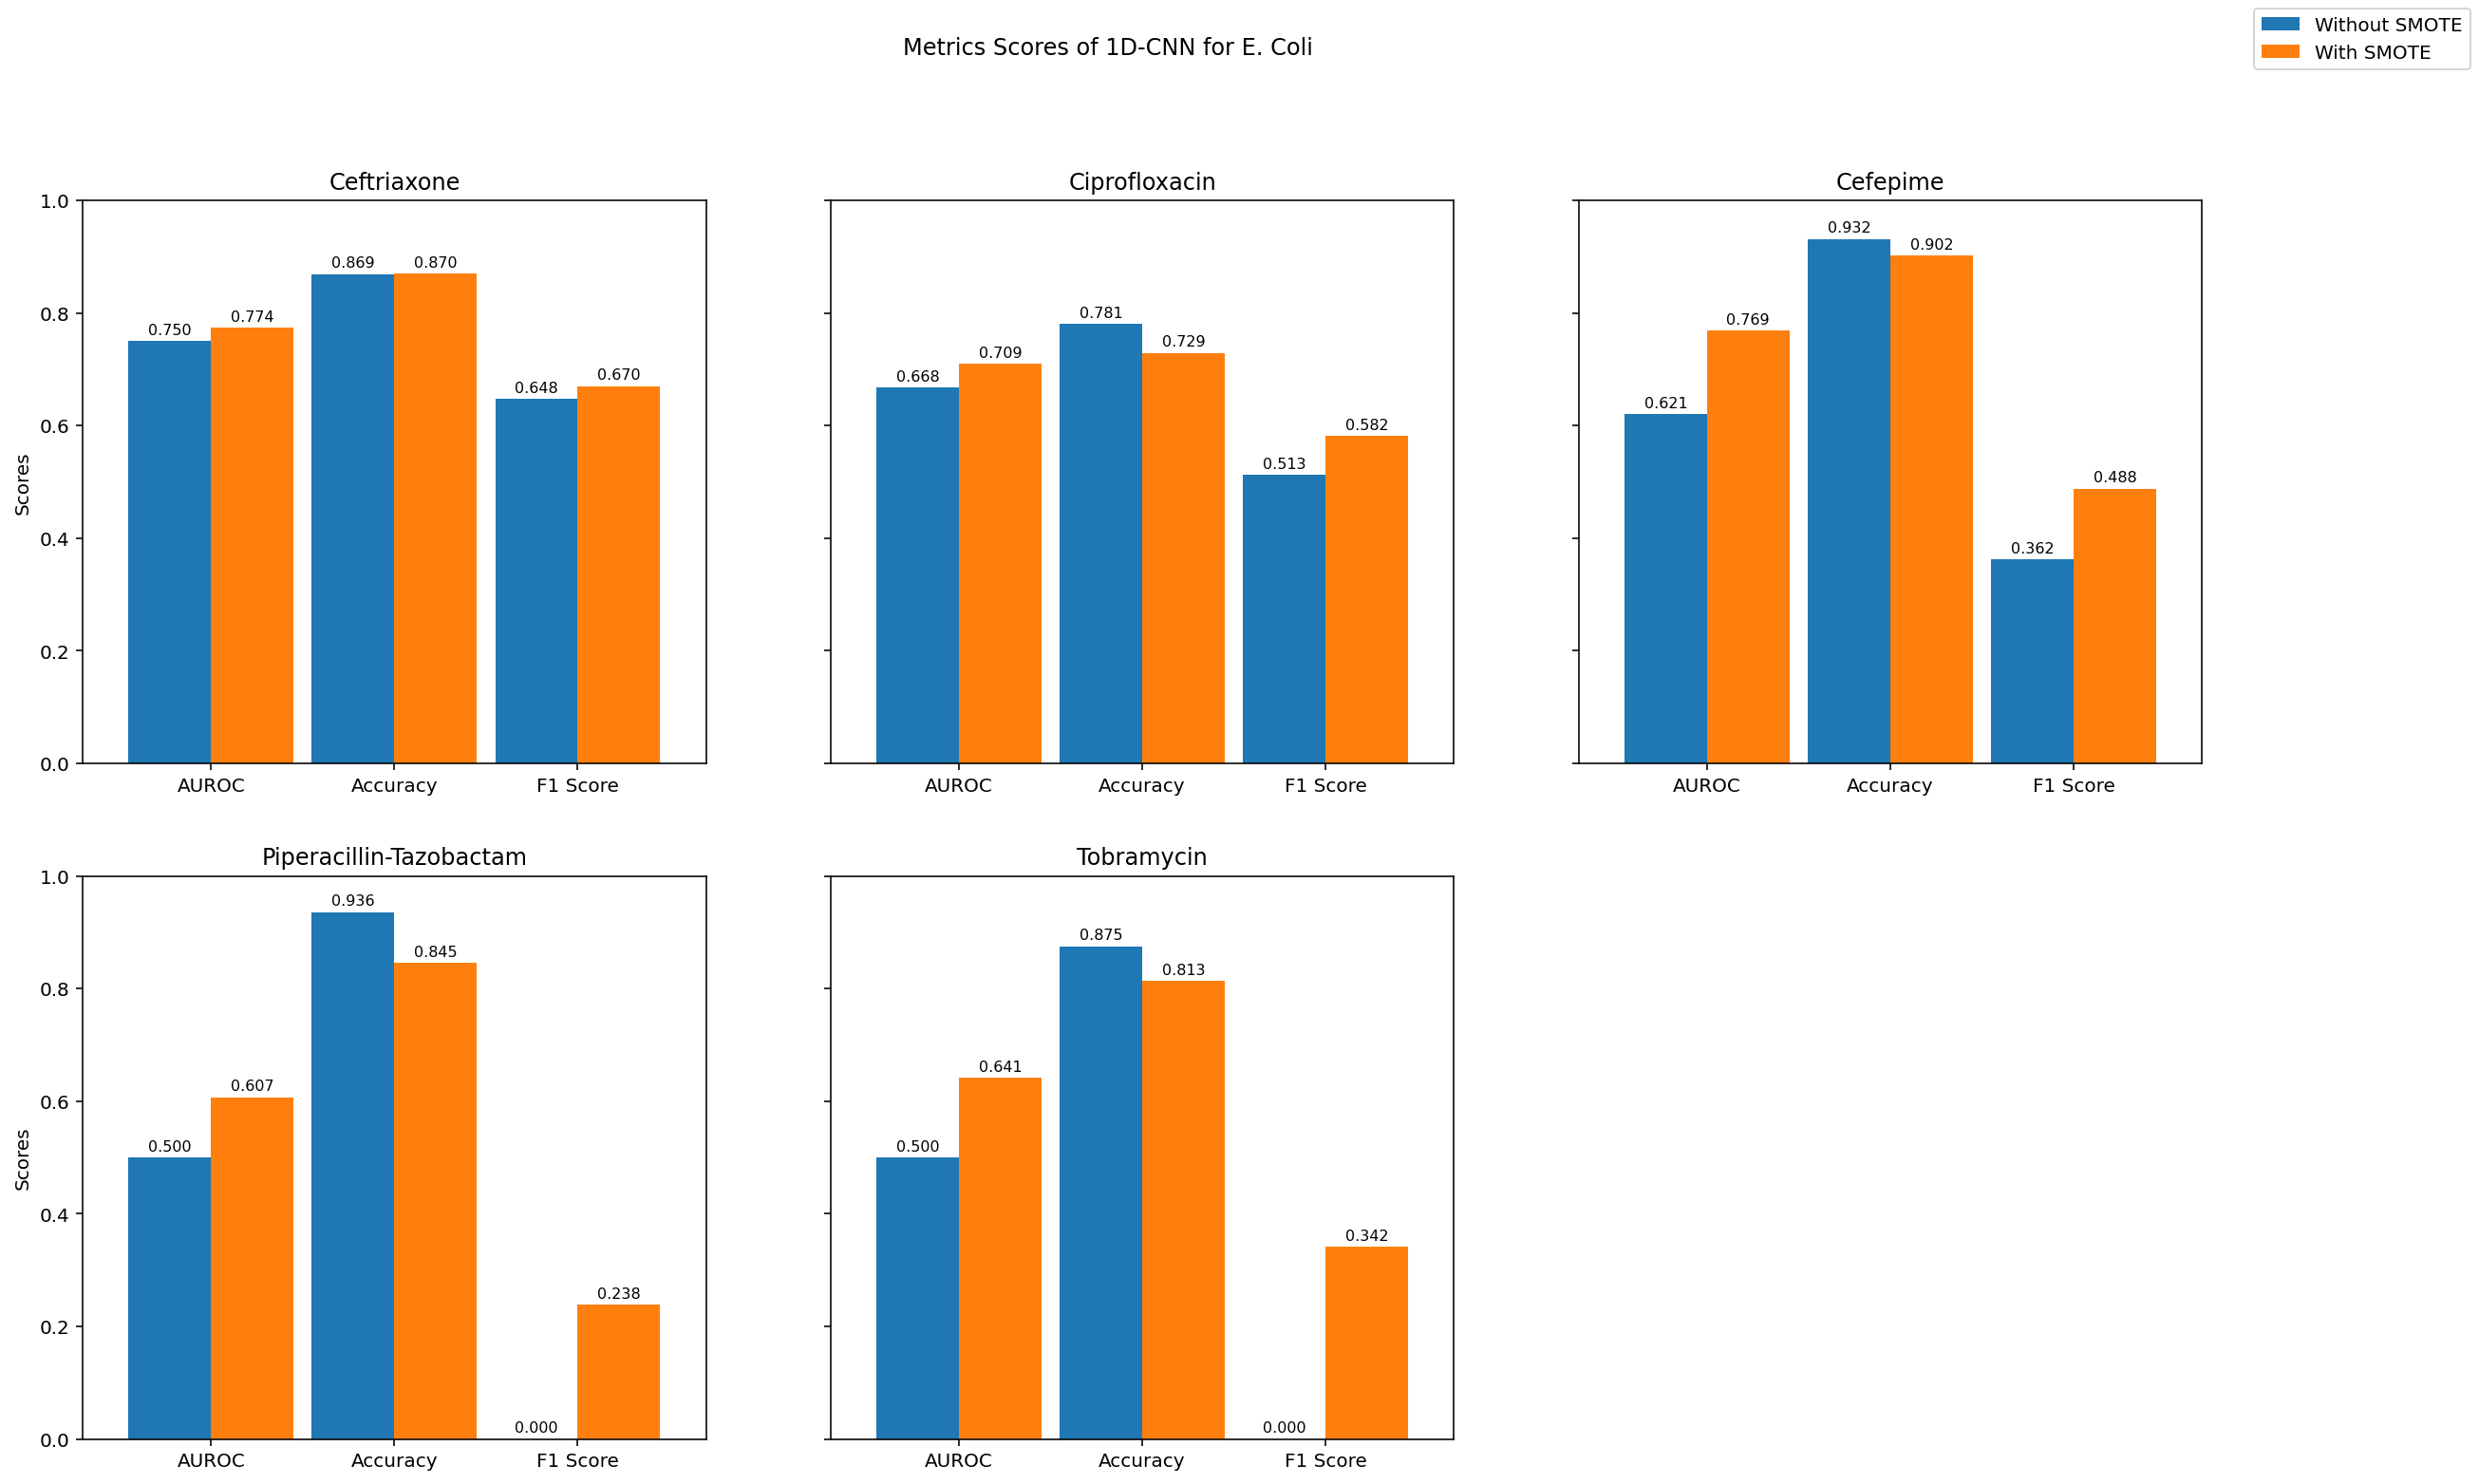

In [5]:
ecoli_results.bar_plot(
    title='Metrics Scores of 1D-CNN for E. Coli',
    save_as='./results/1d_cnn/ecoli/bar.png',
    nrows=2,
    ncols=3,
    sharey=True,
    figsize=(20, 12),
    y_lim=(0, 1),
)

### Box Graph (E. Coli)

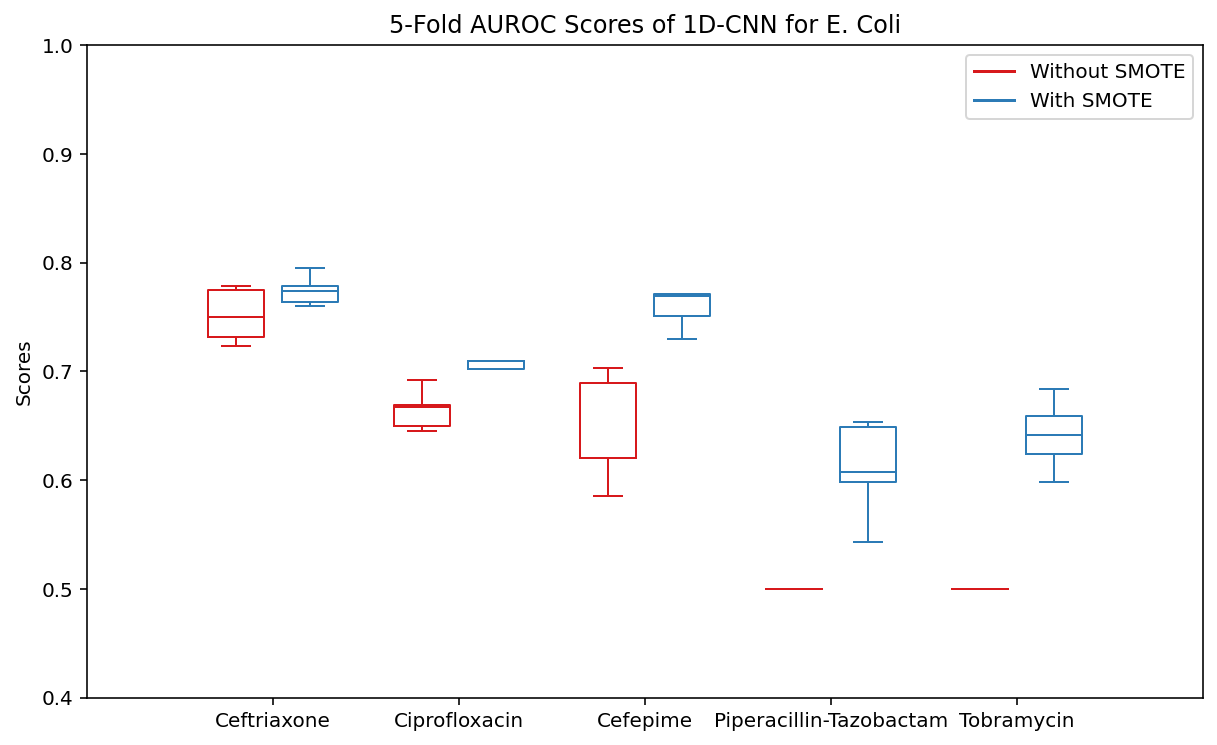

In [6]:
ecoli_results.box_plot(
    save_as='./results/1d_cnn/ecoli/box.png',
    # format subtitles (`{}` will be replaced with metrics' name)
    subtitle_template='5-Fold {} Scores of 1D-CNN for E. Coli',
    # plot AUROC only
    metrics=['AUROC'],
    # set view limits for y-axis
    y_lim=(0.4, 1.0),
    figsize=(10, 6),
)

## K. pneumoniae

In [7]:
kpn_trainer = Trainer(
    pathogen='Klebsiella pneumoniae',
    n_splits=5,
    sites=sites,
    years=years,
)

kpn_drugs = [
    'Ciprofloxacin',
    'Ceftriaxone',
    'Cefepime',
    'Meropenem',
    'Tobramycin',
]

for drug in kpn_drugs:
    kpn_trainer.fit(
        drug=drug,
        model=build_cnn_1d,
        # params for `model.fit()`
        epochs=100,
        validation_split=0.2,
        verbose=0,
        callbacks=cnn_callbacks,
    )

# collect results
kpn_results = kpn_trainer.collect_results()
kpn_results.save_to('./results/1d_cnn/kpn')

Loading Ciprofloxacin...
Training w/o SMOTE...
Fold 1/5...
18/18 [==============================] - 0s 3ms/step
AUC=0.6420535011801731, ACC=0.8610603290676416, f1=0.41538461538461535
Fold 2/5...
18/18 [==============================] - 0s 3ms/step
AUC=0.5961316548649358, ACC=0.8683729433272395, f1=0.32075471698113206
Fold 3/5...
18/18 [==============================] - 0s 3ms/step
AUC=0.5, ACC=0.850091407678245, f1=0.0
Fold 4/5...
18/18 [==============================] - 0s 3ms/step
AUC=0.5466299501704696, ACC=0.8610603290676416, f1=0.1739130434782609
Fold 5/5...
18/18 [==============================] - 0s 2ms/step
AUC=0.5311031461569096, ACC=0.8351648351648352, f1=0.1509433962264151
Training w/ SMOTE...
Fold 1/5...
18/18 [==============================] - 0s 2ms/step
AUC=0.716692892735379, ACC=0.8171846435100548, f1=0.4845360824742268
Fold 2/5...
18/18 [==============================] - 0s 3ms/step
AUC=0.6567925517964857, ACC=0.8007312614259597, f1=0.40437158469945356
Fold 3/5...
18/1

### Bar Graph (K. pneumoniae)

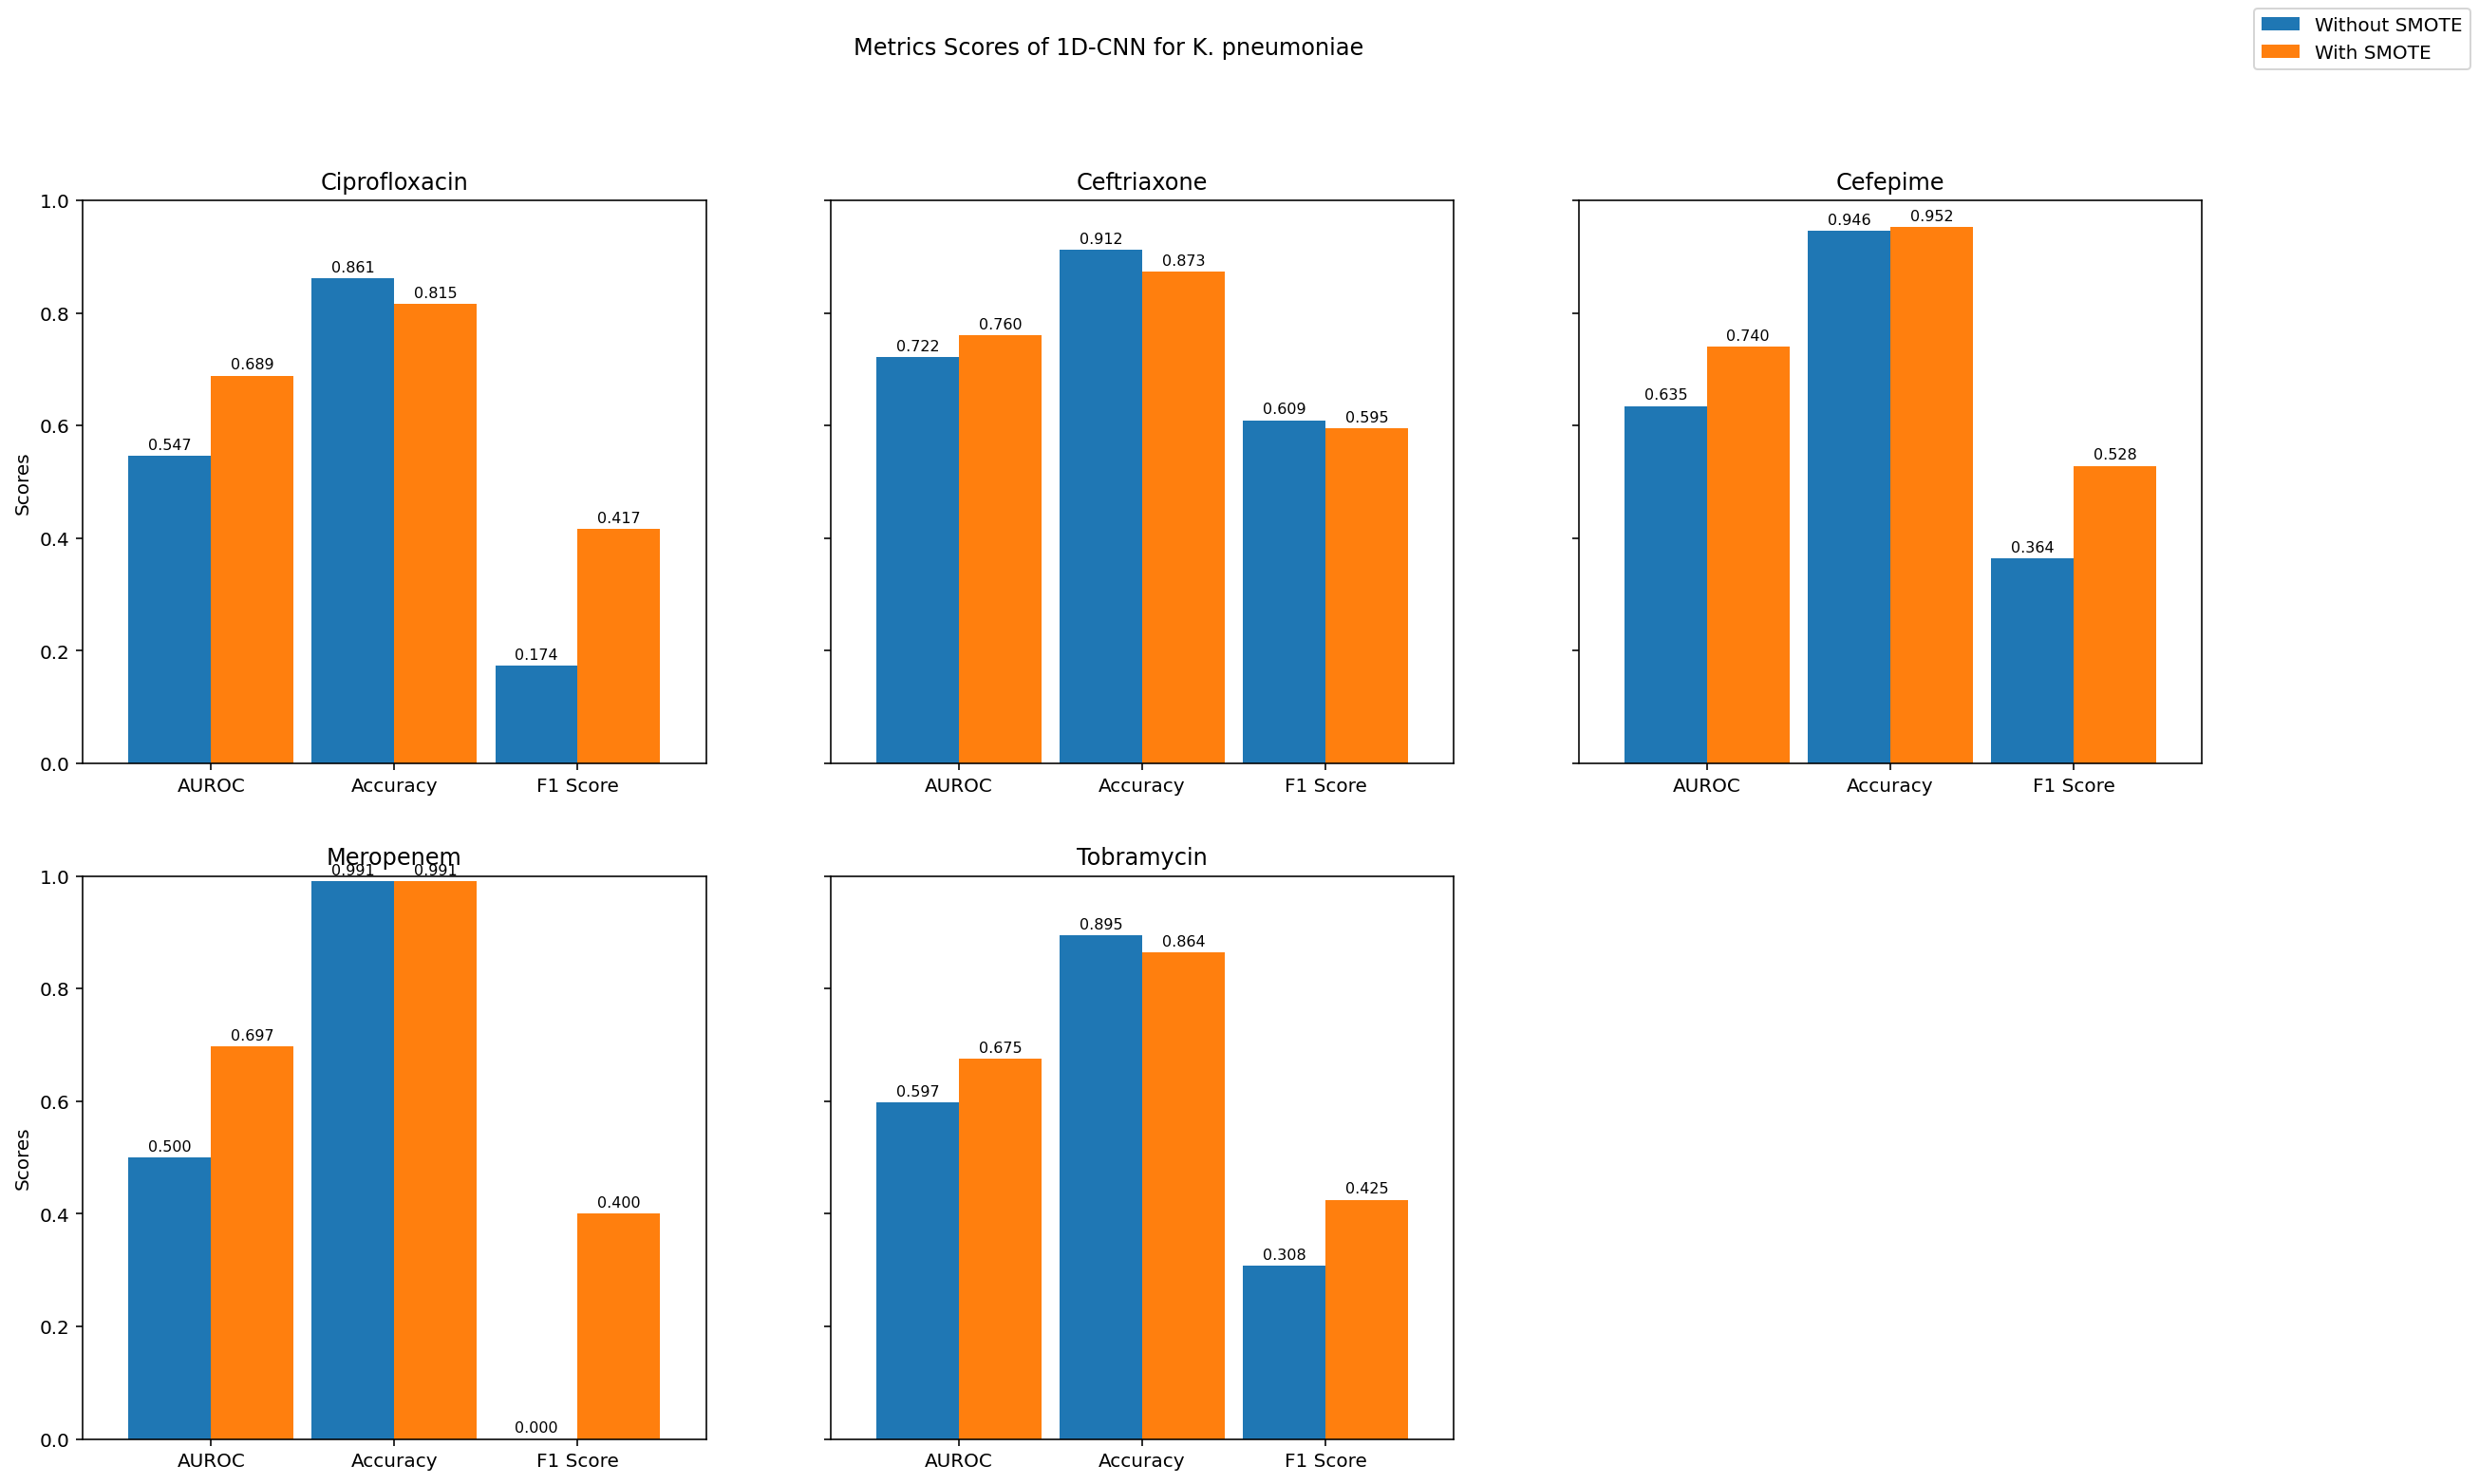

In [8]:
kpn_results.bar_plot(
    title='Metrics Scores of 1D-CNN for K. pneumoniae',
    save_as='./results/1d_cnn/kpn/bar.png',
    nrows=2,
    ncols=3,
    sharey=True,
    figsize=(20, 12),
    y_lim=(0, 1),
)

### Box Graph (K. pneumoniae)

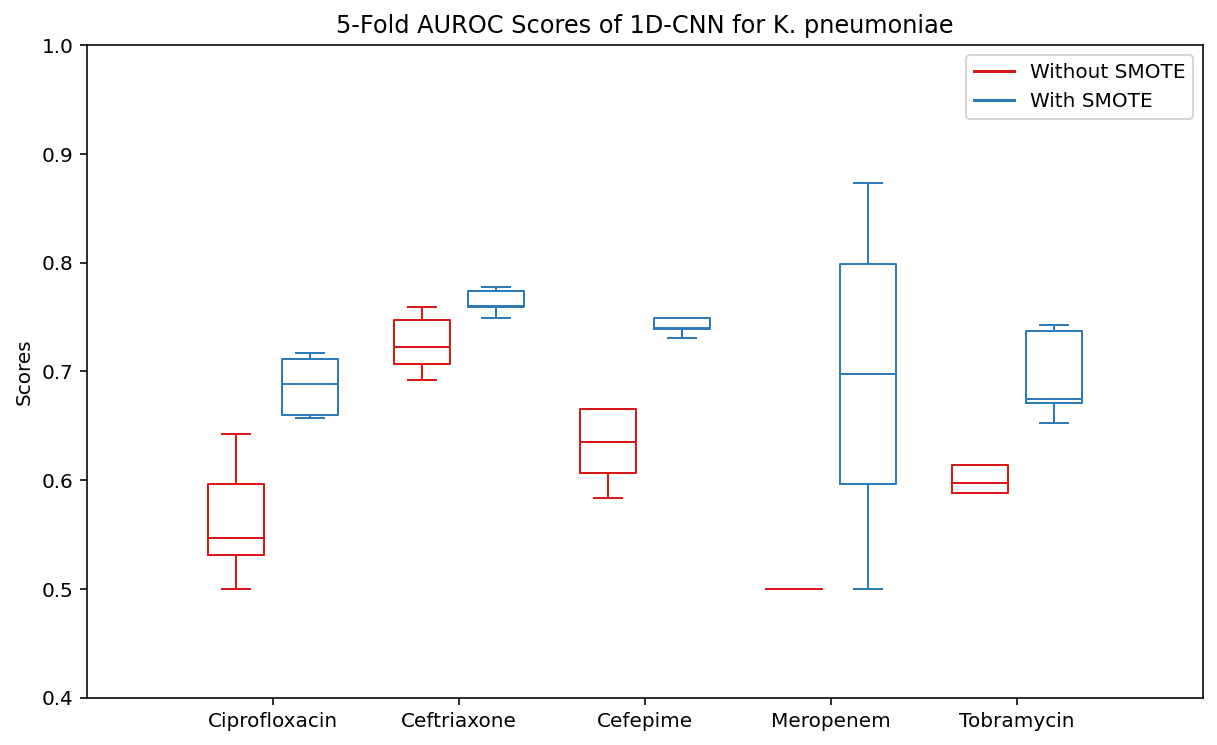

In [9]:
kpn_results.box_plot(
    save_as='./results/1d_cnn/kpn/box.png',
    # format subtitles (`{}` will be replaced with metrics' name)
    subtitle_template='5-Fold {} Scores of 1D-CNN for K. pneumoniae',
    # plot AUROC only
    metrics=['AUROC'],
    # set view limits for y-axis
    y_lim=(0.4, 1.0),
    figsize=(10, 6),
)

## S. aureus

In [10]:
aureus_trainer = Trainer(
    pathogen='Staphylococcus aureus',
    n_splits=5,
    sites=sites,
    years=years,
)

aureus_drugs = [
    'Ciprofloxacin',
    'Fusidic acid',
    'Oxacillin',
]

for drug in aureus_drugs:
    aureus_trainer.fit(
        drug=drug,
        model=build_cnn_1d,
        # params for `model.fit()`
        epochs=100,
        validation_split=0.2,
        verbose=0,
        callbacks=cnn_callbacks,
    )

# collect results
aureus_results = aureus_trainer.collect_results()
aureus_results.save_to('./results/1d_cnn/aureus')

Loading Ciprofloxacin...
Training w/o SMOTE...
Fold 1/5...
23/23 [==============================] - 0s 2ms/step
AUC=0.7179063701051137, ACC=0.8989071038251366, f1=0.5647058823529411
Fold 2/5...
23/23 [==============================] - 0s 2ms/step
AUC=0.7327546224723269, ACC=0.8755129958960328, f1=0.5472636815920398
Fold 3/5...
23/23 [==============================] - 0s 2ms/step
AUC=0.6724460453898954, ACC=0.8974008207934336, f1=0.49664429530201337
Fold 4/5...
23/23 [==============================] - 0s 2ms/step
AUC=0.70809628347041, ACC=0.9028727770177839, f1=0.5590062111801242
Fold 5/5...
23/23 [==============================] - 0s 3ms/step
AUC=0.6935331766742935, ACC=0.8987688098495212, f1=0.5316455696202531
Training w/ SMOTE...
Fold 1/5...
23/23 [==============================] - 0s 2ms/step
AUC=0.7500115763964993, ACC=0.8633879781420765, f1=0.5495495495495496
Fold 2/5...
23/23 [==============================] - 0s 3ms/step
AUC=0.7885180260960979, ACC=0.8248974008207934, f1=0.54285

### Bar Graph (S. aureus)

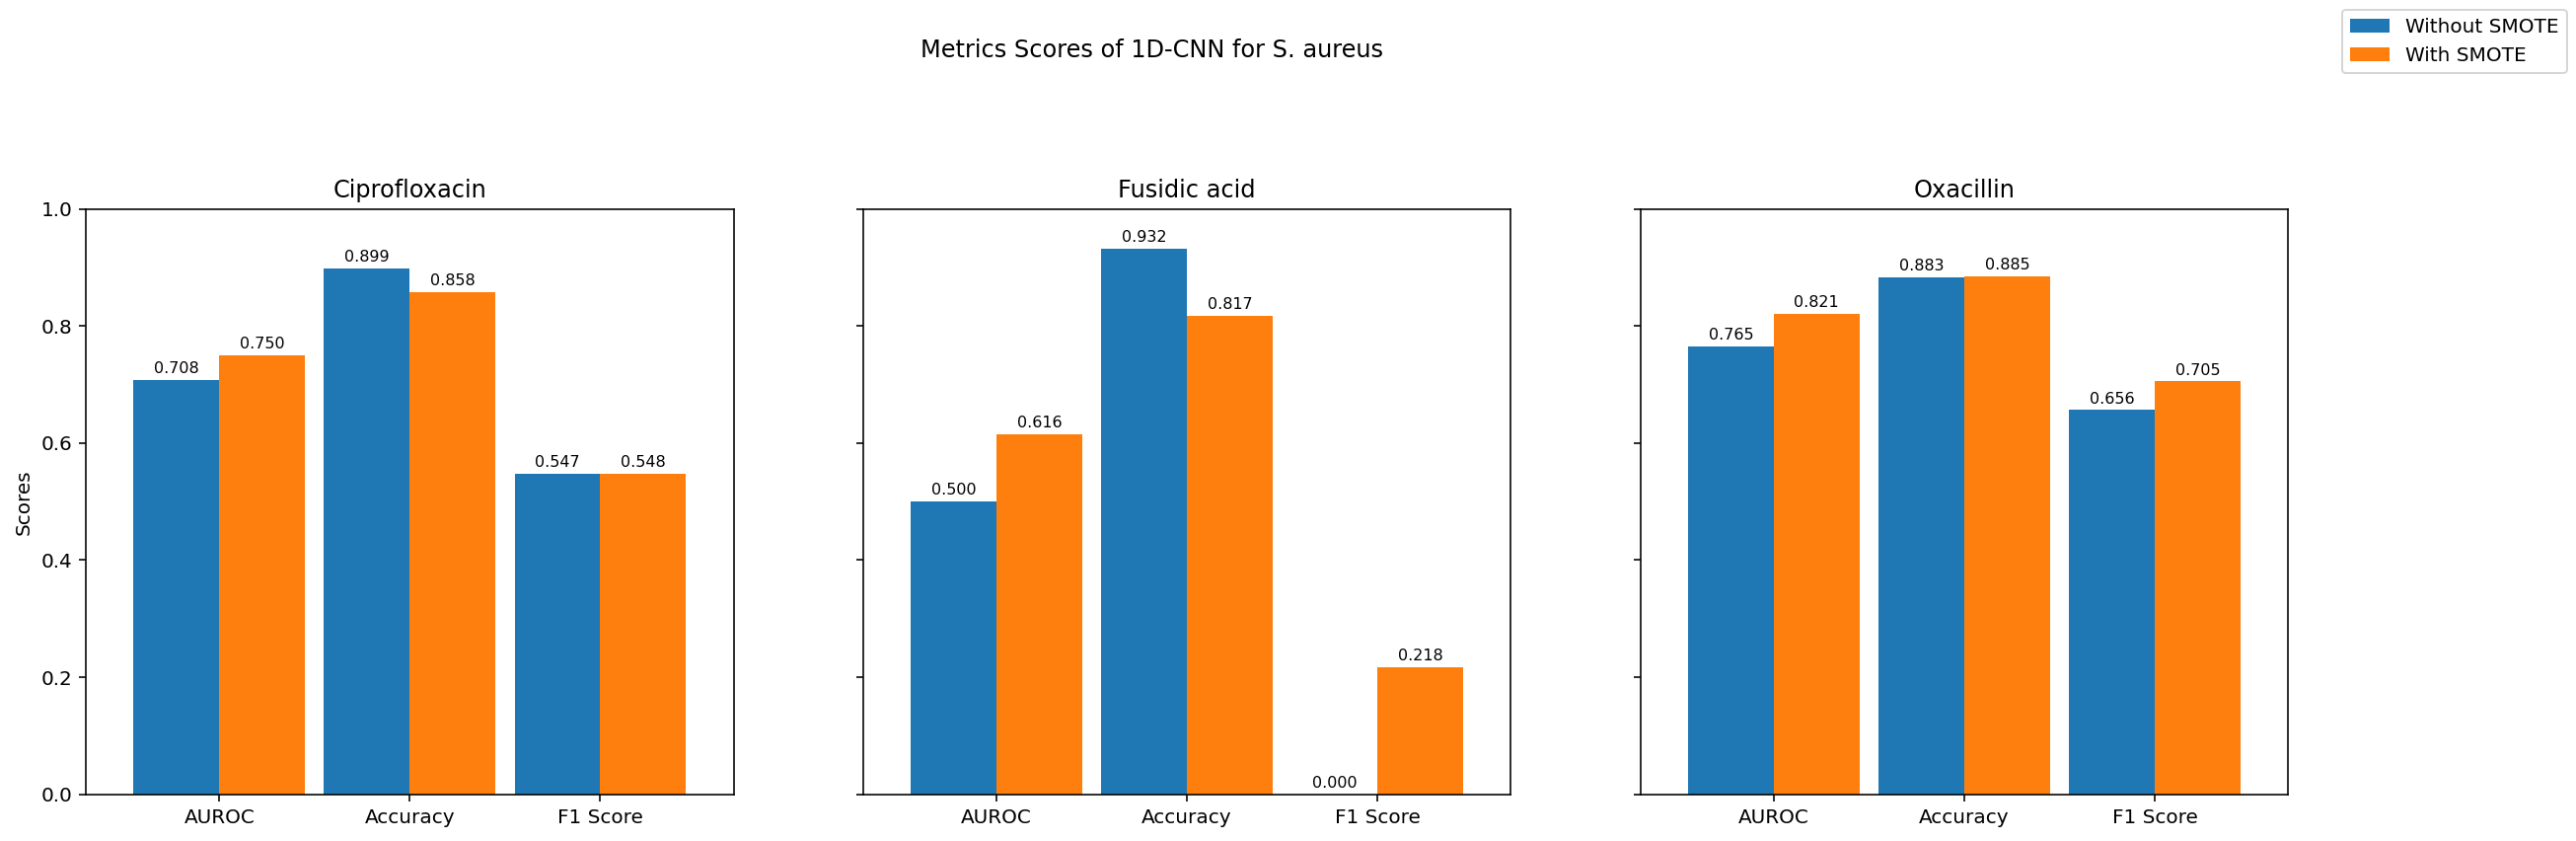

In [11]:
aureus_results.bar_plot(
    title='Metrics Scores of 1D-CNN for S. aureus',
    save_as='./results/1d_cnn/aureus/bar.png',
    nrows=2,
    ncols=3,
    sharey=True,
    figsize=(20, 12),
    y_lim=(0, 1),
)

### Box Graph (S. aureus)

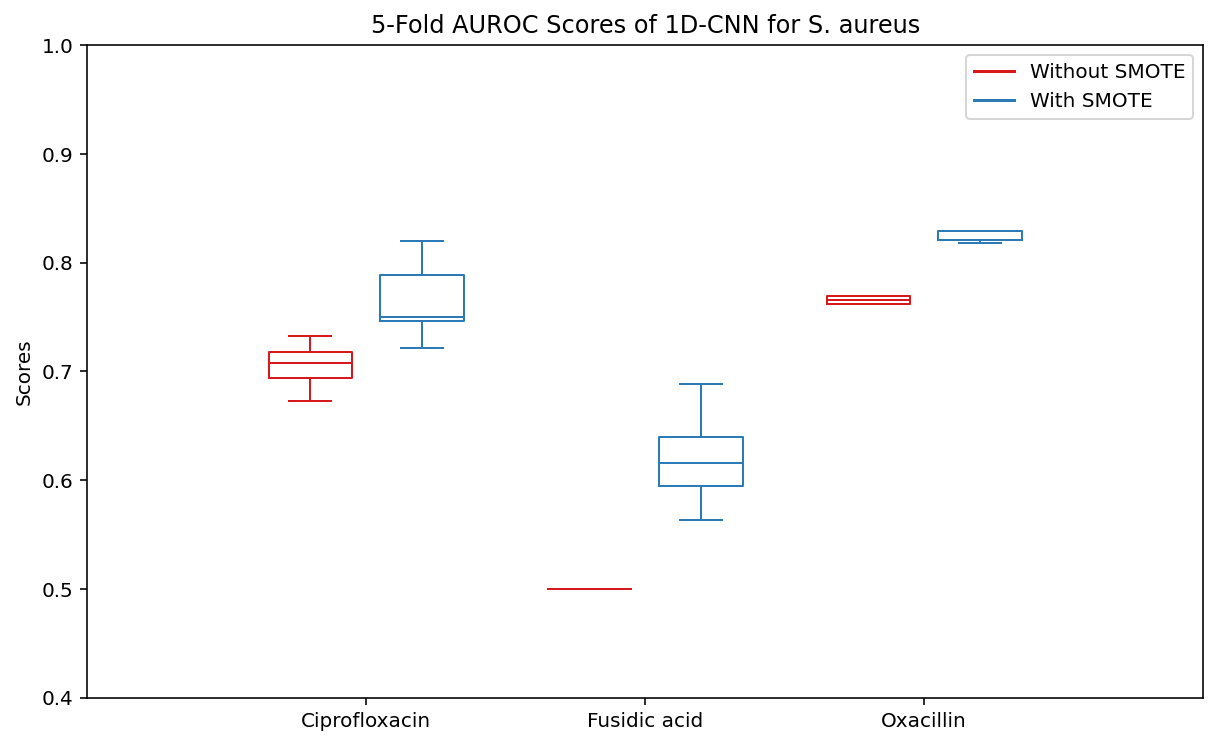

In [12]:
aureus_results.box_plot(
    save_as='./results/1d_cnn/aureus/box.png',
    # format subtitles (`{}` will be replaced with metrics' name)
    subtitle_template='5-Fold {} Scores of 1D-CNN for S. aureus',
    # plot AUROC only
    metrics=['AUROC'],
    # set view limits for y-axis
    y_lim=(0.4, 1.0),
    figsize=(10, 6),
)
